In [1]:
!pip install numpy
!pip install pandas

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

statsmodels 0.10.0rc2 requires pandas>=0.19, which is not installed.
statsmodels 0.10.0rc2 requires patsy>=0.4.0, which is not installed.
statsmodels 0.10.0rc2 requires scipy>=0.18, which is not installed.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

statsmodels 0.10.0rc2 requires patsy>=0.4.0, which is not installed.
statsmodels 0.10.0rc2 requires scipy>=0.18, which is not installed.



  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)


In [2]:
!pip install seaborn
!pip install matplotlib
!pip install xgboost
!pip install sklearn

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

statsmodels 0.10.0rc2 requires patsy>=0.4.0, which is not installed.



  Using cached scipy-1.5.2-cp37-cp37m-win_amd64.whl (31.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)
Processing c:\users\suresh\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib

import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [10]:
cols_to_label=[]
for i in df.columns:
    if df[i].dtypes == 'O':
        cols_to_label.append(i)

cols_to_label

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [11]:
df[cols_to_label] = df[cols_to_label].apply(LabelEncoder().fit_transform) 

In [15]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


c:\users\suresh\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Response', ylabel='count'>

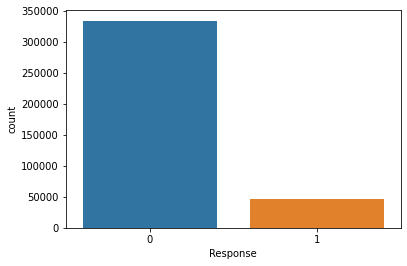

In [13]:
sns.countplot(df['Response'])

c:\users\suresh\anaconda3\envs\health\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

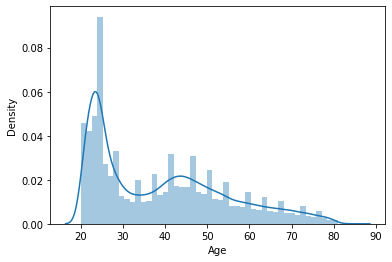

In [14]:
sns.distplot(df['Age'])

c:\users\suresh\anaconda3\envs\health\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

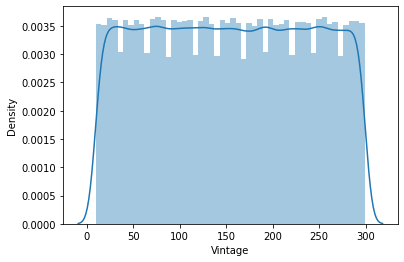

In [16]:
sns.distplot(df['Vintage'])

c:\users\suresh\anaconda3\envs\health\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

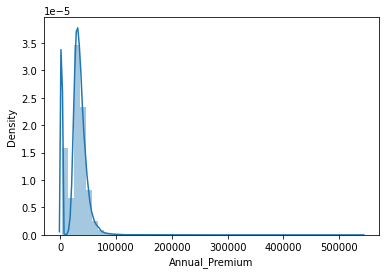

In [17]:
sns.distplot(df['Annual_Premium'])

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

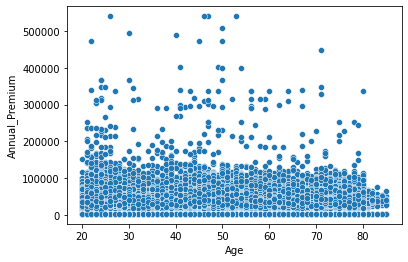

In [18]:
sns.scatterplot(x='Age', y='Annual_Premium', data=df)

c:\users\suresh\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

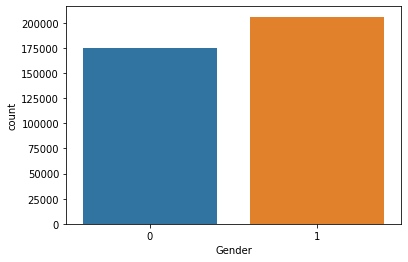

In [19]:
sns.countplot(df['Gender'])

In [20]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Gender
1    206089
0    175020
Name: Gender, dtype: int64
Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64
Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0   

In [21]:
df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,0.516388,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.577698,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [22]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [23]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [24]:
cols_to_scale = ['Age','Annual_Premium','Policy_Sales_Channel','Vintage']

scaler = StandardScaler().fit(df[cols_to_scale])
df[cols_to_scale] = pd.DataFrame(scaler.transform(df[cols_to_scale]), columns=cols_to_scale)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.333777,1,28.0,0,2,1,0.574539,-1.587234,0.748795,1
1,1,2.396751,1,3.0,0,0,0,0.172636,-1.587234,0.342443,0
2,1,0.527181,1,28.0,0,2,1,0.449053,-1.587234,-1.521998,1
3,1,-1.148985,1,11.0,1,1,0,-0.113018,0.737321,0.581474,0
4,0,-0.633242,1,41.0,1,1,0,-0.178259,0.737321,-1.378580,0


<AxesSubplot:>

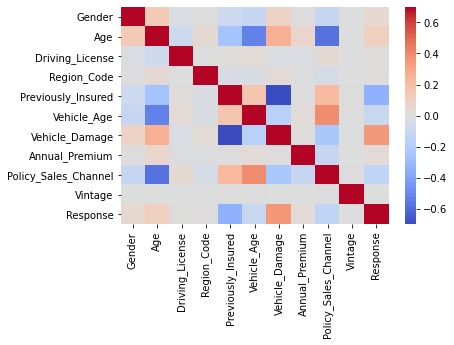

In [26]:
sns.heatmap(df.corr() ,cmap='coolwarm', vmax=0.7, vmin=-0.7)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Response', axis=1), df['Response'], test_size=0.2)

In [28]:
model1 = LogisticRegression(random_state = 365).fit(X_train, y_train)
preds = model1.predict(X_test)
print(f'The accuracy score of Logistic Regression model is: {accuracy_score(preds, y_test)}')

The accuracy score of Logistic Regression model is: 0.8764923512896539


c:\users\suresh\anaconda3\envs\health\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
model2 = XGBClassifier().fit(X_train, y_train)
preds = model2.predict(X_test)
print(f'The accuracy score of XGBClassifier model is: {accuracy_score(preds, y_test)}')

The accuracy score of XGBClassifier model is: 0.876203720710556
